# KNN

In [ ]:
import pandas as pd
zoo = pd.read_csv('/content/Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

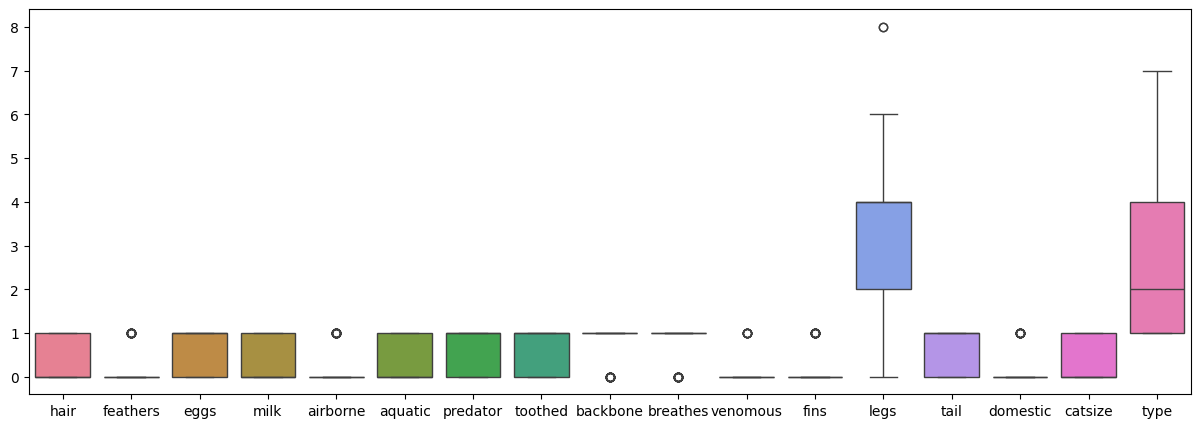

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = zoo)

In [ ]:
zoo['feathers'].value_counts()

feathers
0    81
1    20
Name: count, dtype: int64

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'type'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

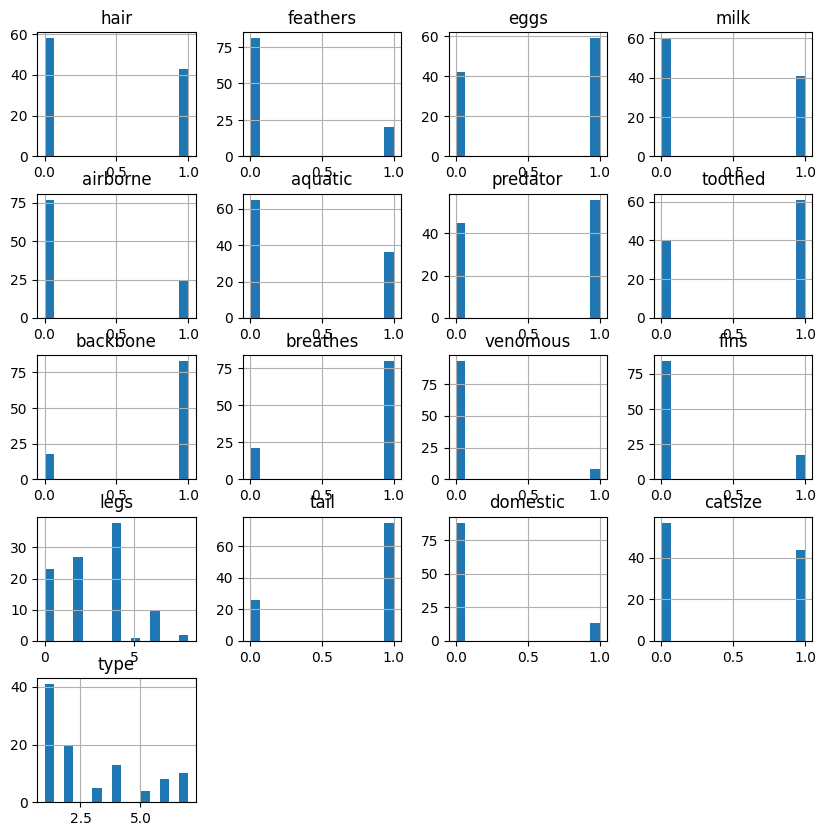

In [ ]:
zoo.hist(bins = 15,figsize = (10,10))

<Axes: >

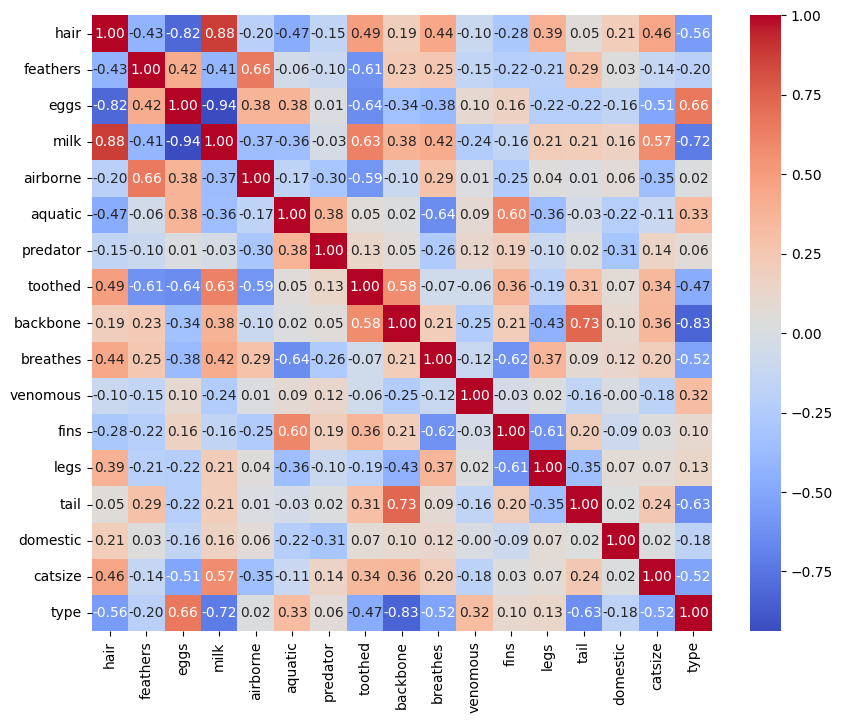

In [ ]:
correlation_matrix = zoo.iloc[:,1:].corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix ,cmap = 'coolwarm' , annot = True,fmt = '.2f')

In [ ]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [ ]:
def remove_outliers(data):
  numerical_columns = data.select_dtypes(include = {'int64','float64'})
  for i in numerical_columns:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + (1.5 * IQR)
    LL = Q1 - (1.5 * IQR)
    data = data[(data[i] >= LL) & (data[i] <= UL)]
  return data

out_data = remove_outliers(zoo)
out_data


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
22,elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
28,giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
36,hare,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
44,leopard,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
45,lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
(len(out_data) / len(zoo)) * 100

20.792079207920793

In [ ]:
len(out_data)

21

In [ ]:
len(zoo)

101

In [ ]:
(98 / 101)

0.9702970297029703

In [ ]:
x = zoo.iloc[:,1:-1]
y = zoo.iloc[:,-1]

In [ ]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.2 , random_state = 0)


In [ ]:
import numpy as np
from sklearn.model_selection import KFold ,cross_val_score,GridSearchCV

In [ ]:
n_neighbors = np.array(range(0,80))
parameters = dict(n_neighbors = n_neighbors)
parameters

{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator = KNN , param_grid = parameters)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [ ]:
y_pred = grid.predict(x_test)
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2])

In [ ]:
grid.best_score_

0.95

In [ ]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
kfold = KFold(n_splits = 4)
KNN = KNeighborsClassifier(n_neighbors = 1)
results = cross_val_score(KNN  ,x , y, cv = kfold)
print(results)
print(results.mean())

[1.   1.   0.96 0.88]
0.96


Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

accuracy_score = accuracy_score(y_test,y_pred)
print('accuracy_score : ',accuracy_score)

precision_score = precision_score(y_test,y_pred , average = 'macro')
print('precision_score' , precision_score)

recall_score = recall_score(y_test, y_pred , average = 'macro')
print('recall score : ' , recall_score)

f1_score = f1_score(y_test, y_pred , average = 'macro')
print('f1_score : ' , f1_score)

accuracy_score :  1.0
precision_score 1.0
recall score :  1.0
f1_score :  1.0


the model performance is absoultely good